# Proyecto Final - Data Analyst

# 1. Identificación

Una tienda de autos se propuso inicialmente aumentar las ventas de toda su gama, pero se percata que no todo sale de acuerdo al plan de negocios. Por lo que desea impulsar a la marca menos vendida y requiere saber por que esta marca tiene ventas tan bajas. Por lo que se realiza las siguientes consultas:
- ¿Cuál es la marca de autos que tiene menos ventas?
- ¿Que factores son determinantes para aumentar las ventas?
- ¿Que relación tienen estos factores con la marca menos vendida?

In [205]:
import warnings
warnings.filterwarnings('ignore')

In [206]:
import os
os.getcwd()

'C:\\Users\\PC\\DATAPATH\\DATA_ANALYST\\PROYECTO_FINAL'

In [207]:
path= 'C:/Users/PC/DATAPATH/DATA_ANALYST/PROYECTO_FINAL/'

# 2. Recopilación de datos

### Cargando y revisando Data

Documentación read_csv: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [245]:
#Procesamiento
import pandas as pd
import numpy as np
import datetime as dt

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [246]:
car_sales = path+'data/region25_en.csv'

df = pd.read_csv(car_sales)


**Información del dataset**

Este dataset contiene el registro de ventas de vehículos por cada categoría técnica 
que corresponde al auto, con información de los precios, marca y otros como kilometraje
y caballos de motor.

Columnas

- brand: Marca del vehículo.
- name: Nombre del vehículo.
- bodyType: Tipo de cuerpo del vehículo.
- color: Color del vehículo.
- fuelType: Tipo de combustible del vehículo.
- year: Año que salió el modelo del vehículo.
- mileage: Kilometraje recorrido por el vehículo.
- transmission: Tipo de transmisión del vehículo.
- power: Caballos de fuerza del vehículo.
- price: Precio del vehículo.
- vehicleConfiguration: Configuración del vehículo.
- engineName: Nombre del motor del vehículo.
- engineDisplacement: Capacidad del motor del vehículo.
- date: Fecha en que se realizó la venta
- location: Lugar en que realizó la venta.
- link: Link de la publicación de la oferta.
- parse_date: Fecha transformada en que se realizó la venta
 

### Visualizar datos del dataframe
Primeras 5 líneas:



In [247]:
df.head()

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,parse_date
0,Fiat,124 Spider,open,blue,Gasoline,NaN,8000.0,Automatic,NaN,1830000,NaN,NaN,NaN,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/fiat/124_spider/47...,2022-08-20 04:00:00
1,BMW,i3,hatchback 5 doors,black,Electro,NaN,12000.0,Automatic,NaN,1830000,NaN,NaN,NaN,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/bmw/i3/47958301.html,2022-08-20 04:00:00
2,Mercedes-Benz,GLE Coupe,jeep 5 doors,burgundy,Gasoline,2015.0,57000.0,AT,367.0,4600000,450 AMG 4MATIC Особая серия,M 276 DE 30 AL,3.0 LTR,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/mercedes-benz/gle_...,2022-08-20 04:00:00
3,Mercedes-Benz,G-Class,jeep 5 doors,black,Gasoline,2002.0,200000.0,AT,296.0,2999999,G 500,M 113 E 50,5.0 LTR,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/mercedes-benz/g-cl...,2022-08-20 04:00:00
4,Audi,Q7,jeep 5 doors,white,Gasoline,NaN,67000.0,Automatic,252.0,3300000,NaN,NaN,NaN,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/audi/q7/46498184.html,2022-08-20 04:00:00


Últimas 5 líneas:

In [248]:
df.tail()

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,parse_date
1513195,Mitsubishi,Pajero,jeep 5 doors,grey,Gasoline,NaN,80000.0,AT,245.0,600000,NaN,NaN,NaN,2022-09-26 00:00:00,Vladivostok,https://vladivostok.drom.ru/mitsubishi/pajero/...,2022-09-26 19:00:00
1513196,Daihatsu,Mira e:S,hatchback 5 doors,pink,Gasoline,NaN,66000.0,CVT,52.0,430000,NaN,NaN,NaN,2022-09-26 00:00:00,Nahodka,https://nakhodka.drom.ru/daihatsu/mira_e-s/476...,2022-09-26 19:00:00
1513197,Lexus,GX470,jeep 5 doors,black,Gasoline,2002.0,170000.0,AT,235.0,1680000,4.7,2UZ-FE,4.7 LTR,2022-09-26 00:00:00,Ussurijsk,https://ussuriisk.drom.ru/lexus/gx470/47696995...,2022-09-26 19:00:00
1513198,Nissan,Safari,jeep 5 doors,green,Diesel,1997.0,313000.0,AT,160.0,999000,4.2 Granroad limited diesel turbo 4WD,TD42T,4.2 LTR,2022-09-26 00:00:00,Nahodka,https://nakhodka.drom.ru/nissan/safari/4769686...,2022-09-26 19:00:00
1513199,Suzuki,Escudo,jeep 3 doors,white,Gasoline,1997.0,90000.0,AT,100.0,537000,1.6 Helly Hansen limited,G16A,1.6 LTR,2022-09-26 00:00:00,Lesozavodsk,https://lesozavodsk.drom.ru/suzuki/escudo/4769...,2022-09-26 19:00:00


Muestra aleatoria:

In [249]:
df.sample(4)

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,parse_date
1064070,GAZ,2217,minivan,white,Diesel,NaN,9000.0,Manual,120.0,2200000,NaN,NaN,NaN,2022-09-13 00:00:00,Vladivostok,https://vladivostok.drom.ru/gaz/2217/47545755....,2022-09-14 03:00:00
67516,Toyota,Porte,hatchback 3 door,white,Gasoline,NaN,146000.0,AT,87.0,310000,NaN,NaN,NaN,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/toyota/porte/47964...,2022-08-21 13:00:00
906132,Nissan,Patrol,jeep 5 doors,black,Diesel,2001.0,271000.0,AT,158.0,830000,3.0 TD AT Elegance,ZD30DDTi,3.0 LTR,2022-09-09 00:00:00,Vladivostok,https://vladivostok.drom.ru/nissan/patrol/4801...,2022-09-10 01:00:00
1323612,Mitsubishi,Mirage,hatchback 5 doors,white,Gasoline,NaN,139000.0,CVT,69.0,510000,NaN,NaN,NaN,2022-09-20 00:00:00,Ussurijsk,https://ussuriisk.drom.ru/mitsubishi/mirage/47...,2022-09-20 10:00:00


Tamaño del dataframe:

In [250]:
df.shape

(1513200, 17)

## Análisis exploratorio de datos

General

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513200 entries, 0 to 1513199
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   brand                 1513200 non-null  object 
 1   name                  1513200 non-null  object 
 2   bodyType              1513200 non-null  object 
 3   color                 1403466 non-null  object 
 4   fuelType              1509640 non-null  object 
 5   year                  1102226 non-null  float64
 6   mileage               1498720 non-null  float64
 7   transmission          1510135 non-null  object 
 8   power                 1492313 non-null  float64
 9   price                 1513200 non-null  int64  
 10  vehicleConfiguration  1102226 non-null  object 
 11  engineName            1101142 non-null  object 
 12  engineDisplacement    1092435 non-null  object 
 13  date                  1513200 non-null  object 
 14  location              1513200 non-

- Podemos observar valores nulos en las variables color fuelType year, mileage, transmission, power, vehicleConfiguration,engineName y engineDisplacement.
El tipo de dato de la brand, name, bodyType, color, fuelType, transmission, vehicleConfiguration, engineName, engineDisplacement, date, location,link es Object así como el de la variable parse_date.

In [252]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1102226.0,2.010340e+03,7.568868e+00,1943.0,2007.0,2012.0,2016.0,2022.0
mileage,1498720.0,1.342509e+05,8.520383e+04,1000.0,74000.0,124000.0,185000.0,1000000.0
power,1492313.0,1.458111e+02,7.008858e+01,9.0,99.0,132.0,170.0,1000.0
price,1513200.0,1.368558e+06,1.573677e+06,15000.0,505000.0,857000.0,1685000.0,41500000.0


En el análisis descriptivo que realizamos podemos deducir:
- Se considera que tenemos valores atípicos para los campos prices, power y mileage.
- En la variables prices, power y mileage se observa el valor máximo en una escala superior a los demás valores

## Limpieza de datos
Queremos completar los datos de año, kilometraje, color, transmisión y poder faltantes en lugar de simplemente eliminar las filas con datos faltantes. Una forma de hacerlo es rellenándolos con la media o mediana de dichos campos (imputación). Veremos si es lo óptimo.

<AxesSubplot: >

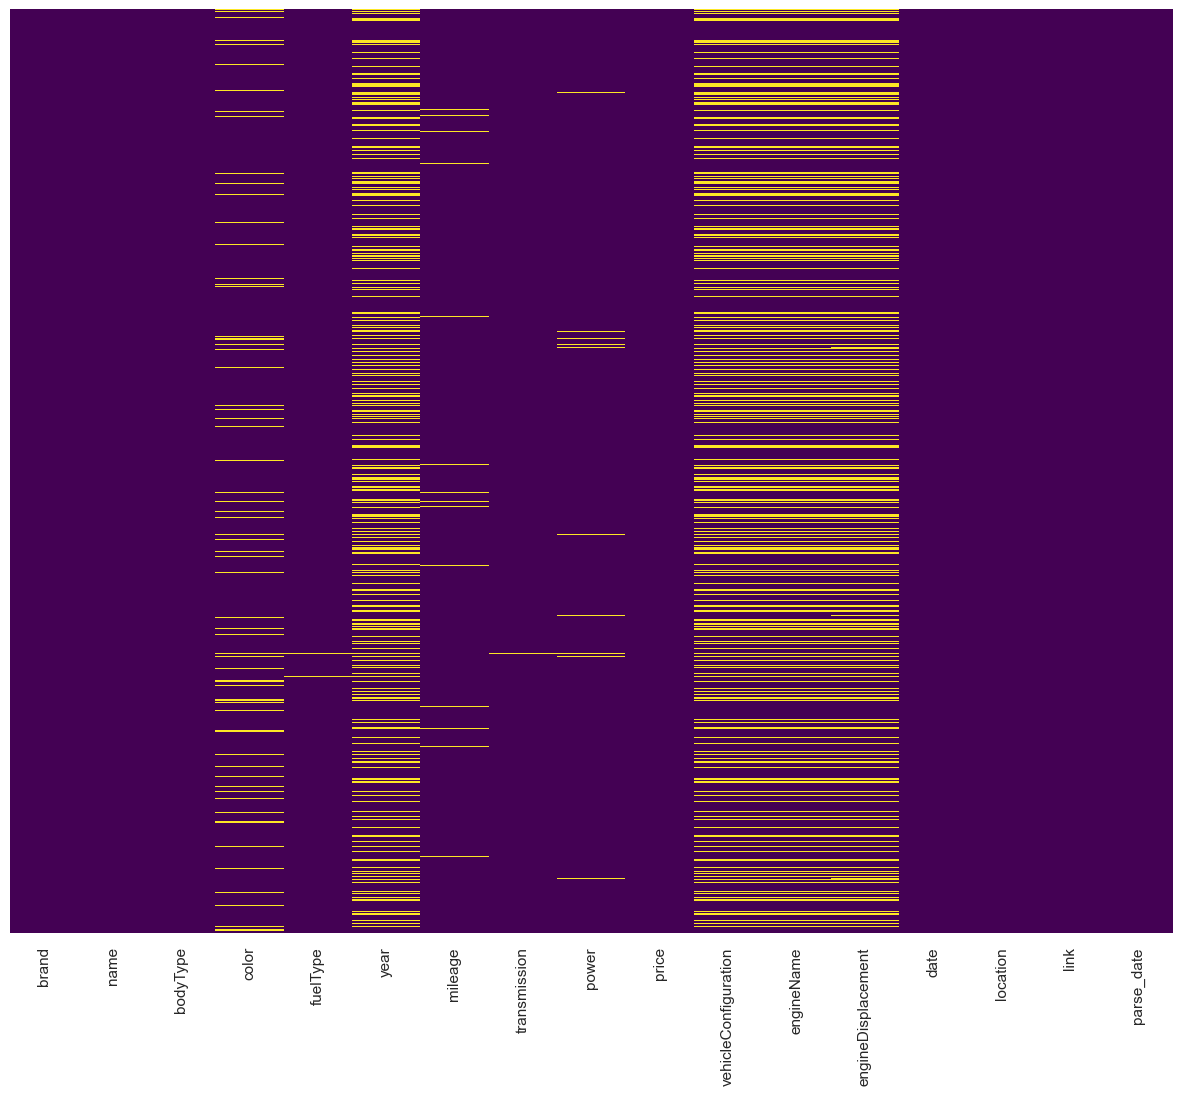

In [253]:
df1=df.copy()
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Se eliminan los campos que no son de relevancia para el análisis, algunos de ellos tienen mucha cantidad de nulos.

In [254]:
df1.drop(columns=['vehicleConfiguration','engineName','engineDisplacement','link','parse_date','date','location'],axis=1,inplace=True)

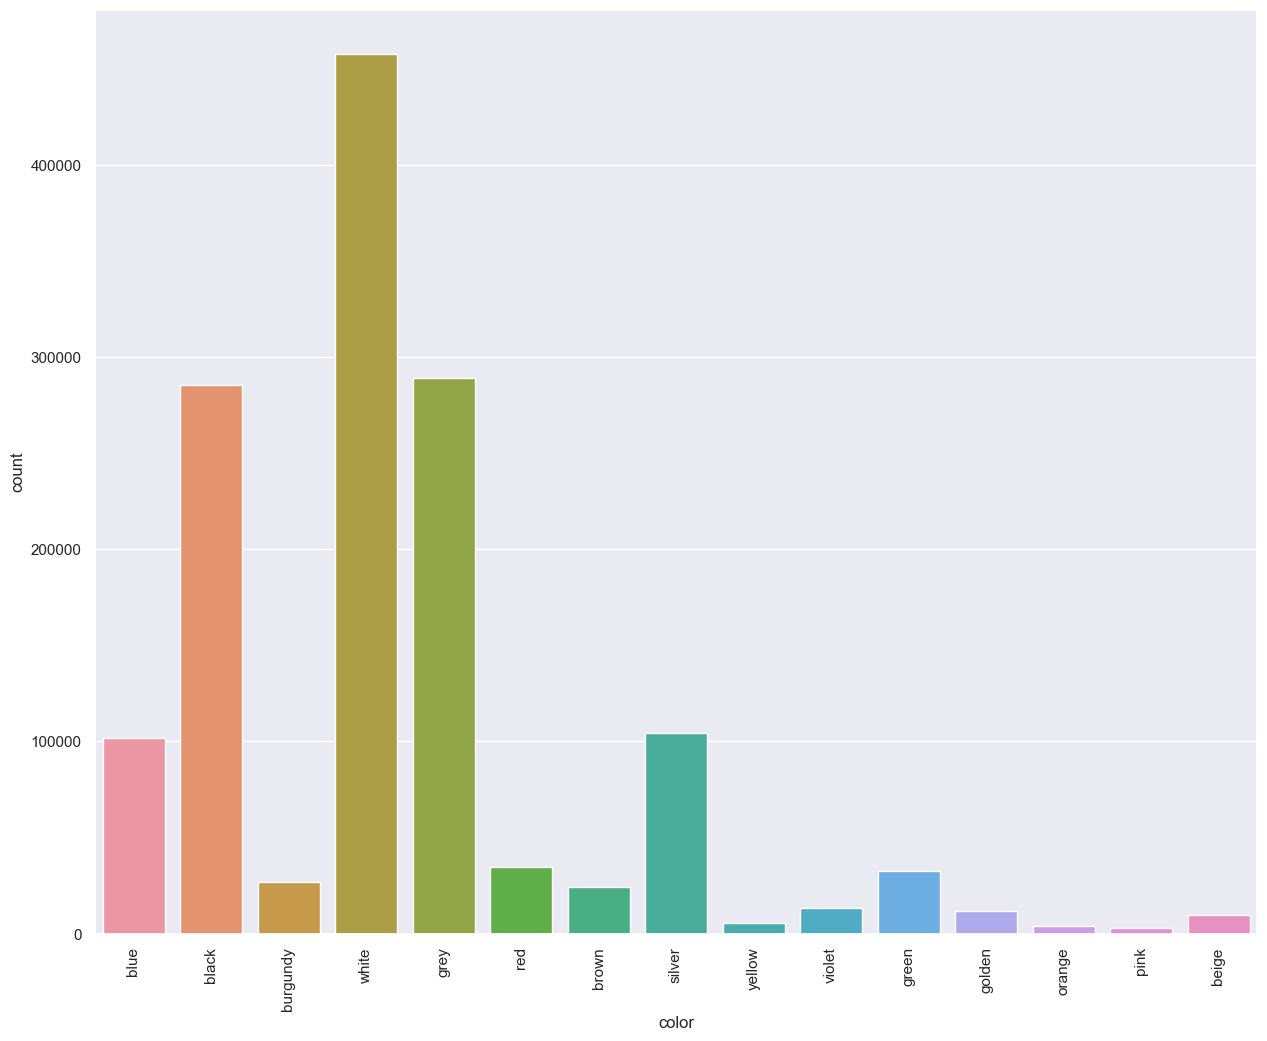

In [255]:
sns.countplot(data=df1,x="color")
sns.set(rc={'figure.figsize':(15,12)})
plt.xticks(rotation=90)
plt.show()

El color más vendido es el blanco con 457827 unidades y el caso del menos vendido es el rosado por 2774 unidades.

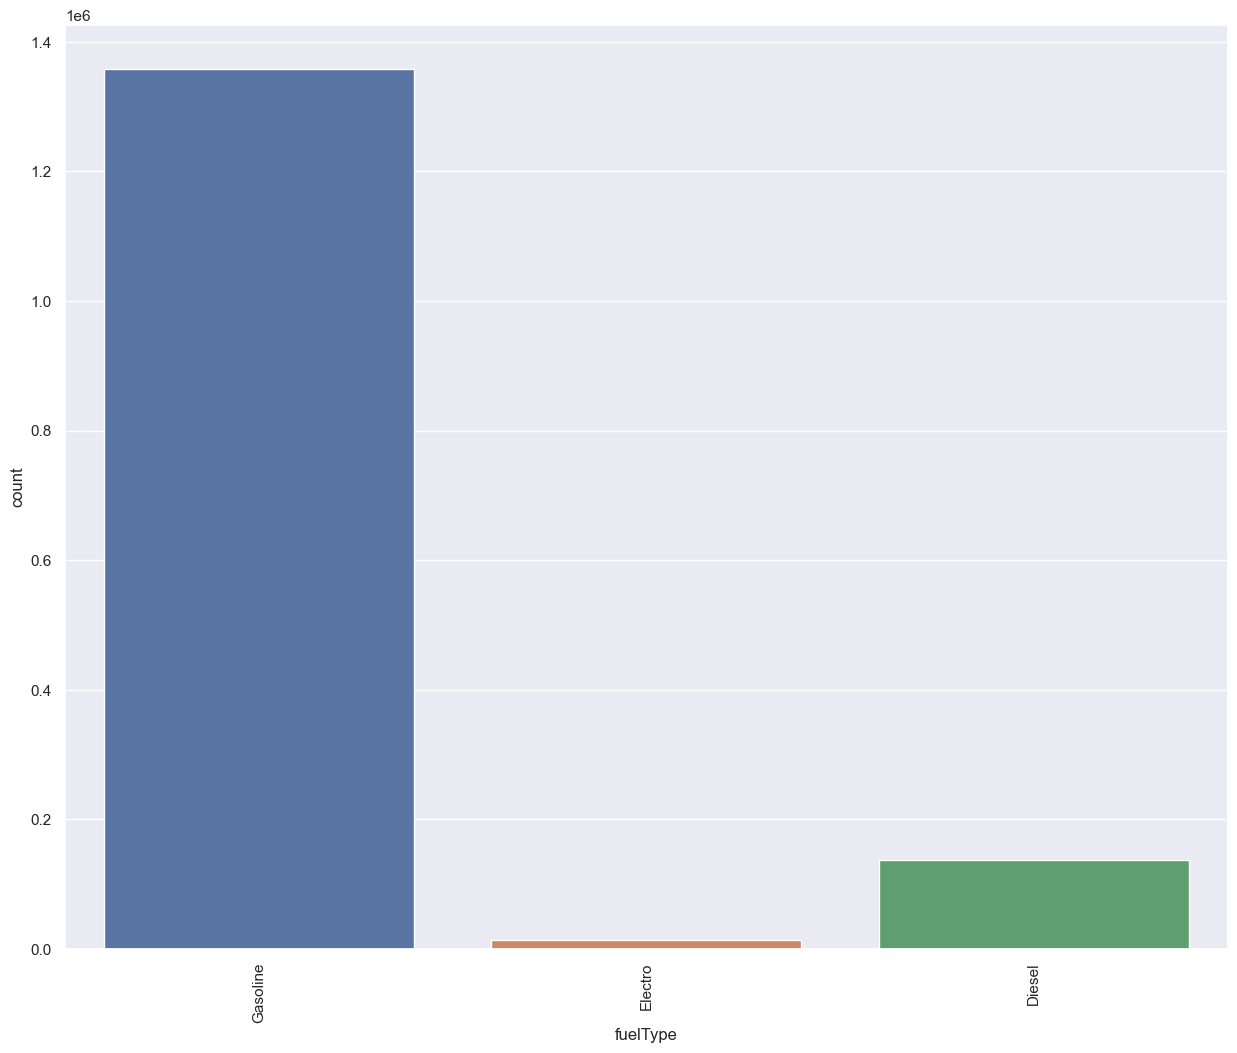

In [256]:
sns.countplot(data=df1,x="fuelType")
sns.set(rc={'figure.figsize':(15,12)})
plt.xticks(rotation=90)
plt.show()

El tipo de combustible de los vehículos más vendidos ha sido la Gasolina.

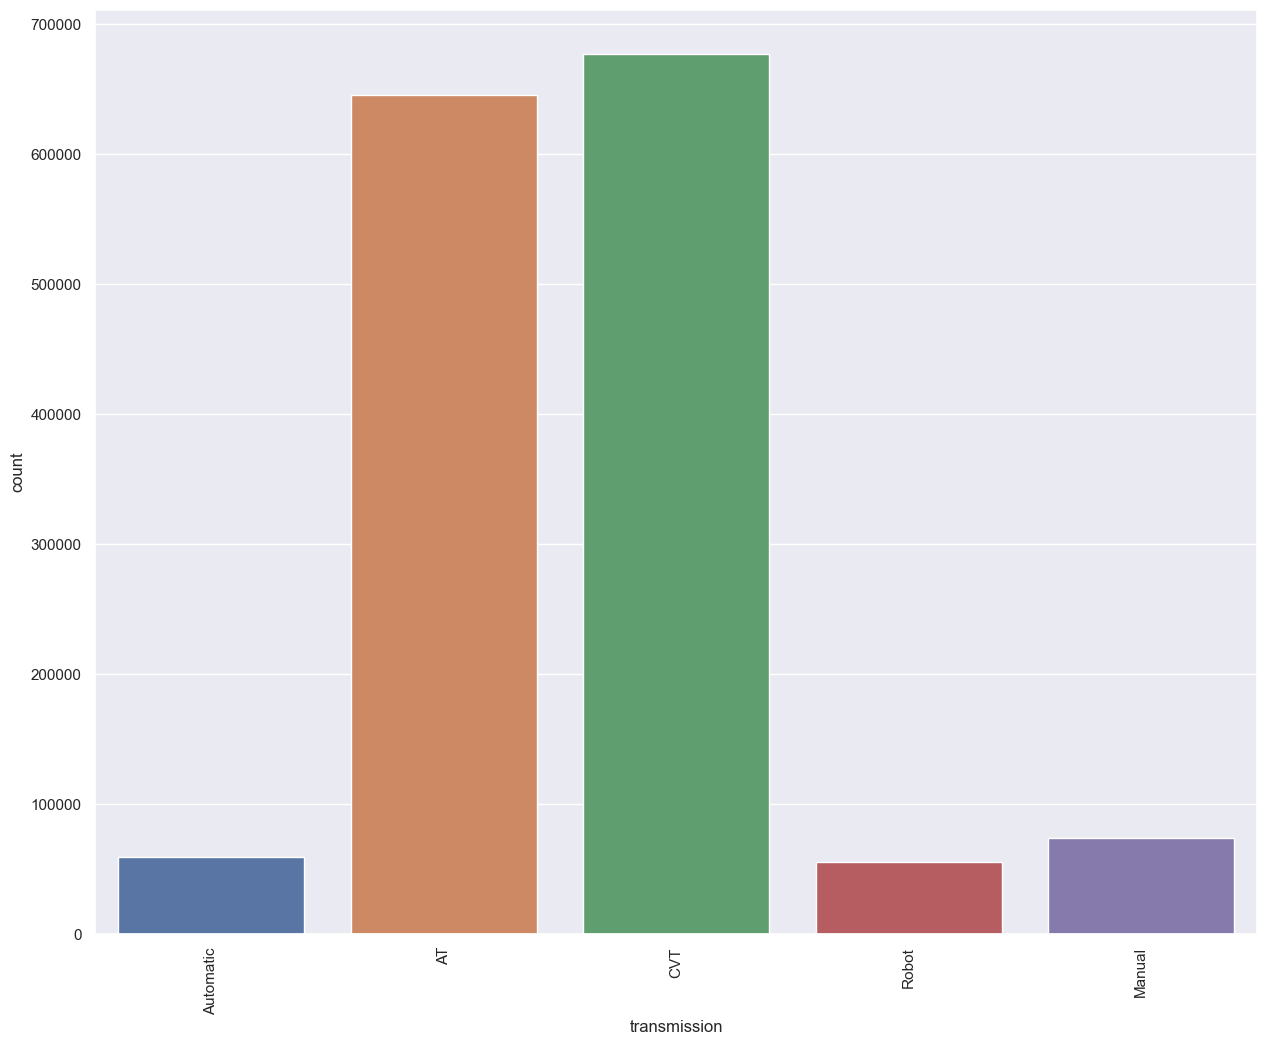

In [257]:
sns.countplot(data=df1,x="transmission")
sns.set(rc={'figure.figsize':(15,12)})
plt.xticks(rotation=90)
plt.show()

El tipo de transmisión más recurrente en las unidades vendidas es CVT.

In [258]:
df1["color"].fillna("white", inplace = True)
df1["fuelType"].fillna("Gasoline", inplace = True)
df1["transmission"].fillna("CVT", inplace = True)
df1 = df1[df1['mileage'].notna()]
df1 = df1[df1['power'].notna()]
df1.isnull().sum()

brand                0
name                 0
bodyType             0
color                0
fuelType             0
year            398292
mileage              0
transmission         0
power                0
price                0
dtype: int64

<AxesSubplot: xlabel='transmission', ylabel='year'>

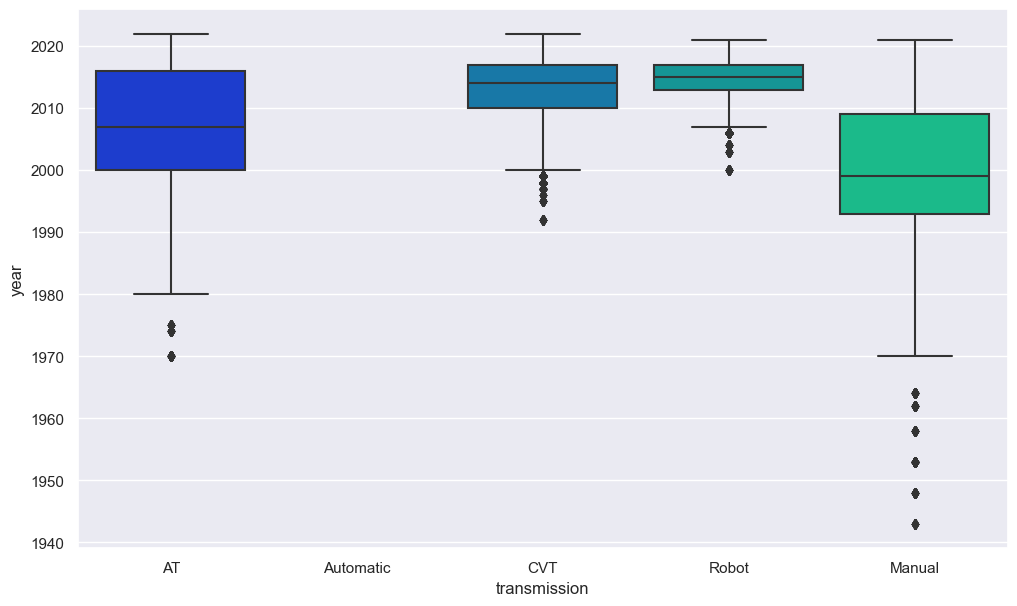

In [259]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='transmission',y='year',data=df1,palette='winter')

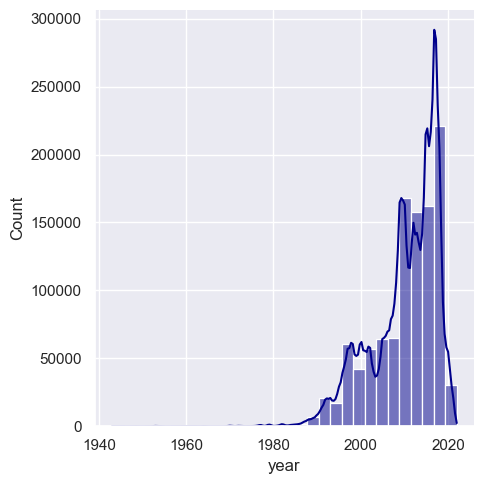

In [260]:
sns.displot(df1['year'].dropna(),kde=True,color='darkblue',bins=30)

El año tiene una media específica para el tipo de tranmisión pero no tiene a ser simétrica de acuerdo a su distribución. Por lo tanto se reemplaza los años nulos por la mediana de dicho campo.

In [261]:
df1['year'].fillna(df1['year'].median(), inplace=True)
df1.isnull().sum()

brand           0
name            0
bodyType        0
color           0
fuelType        0
year            0
mileage         0
transmission    0
power           0
price           0
dtype: int64

## Visualizaciones

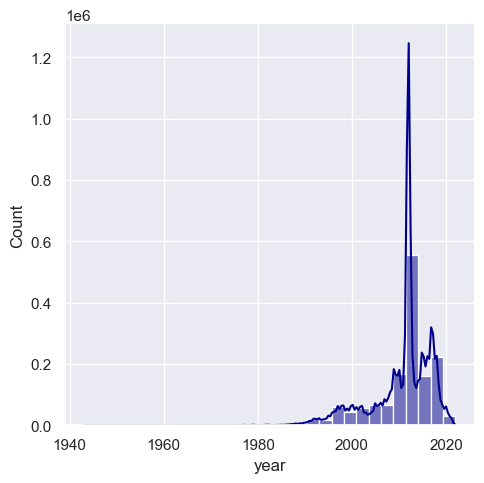

In [262]:
sns.displot(df1['year'],kde=True,color='darkblue',bins=30)

Después de la limpieza, la distribución de los datos de los años tiende a la derecha.Estos valores van desde el año 1949 hasta el 2020.Y vemos un pico, por lo tanto se validará en un gráfico de caja.

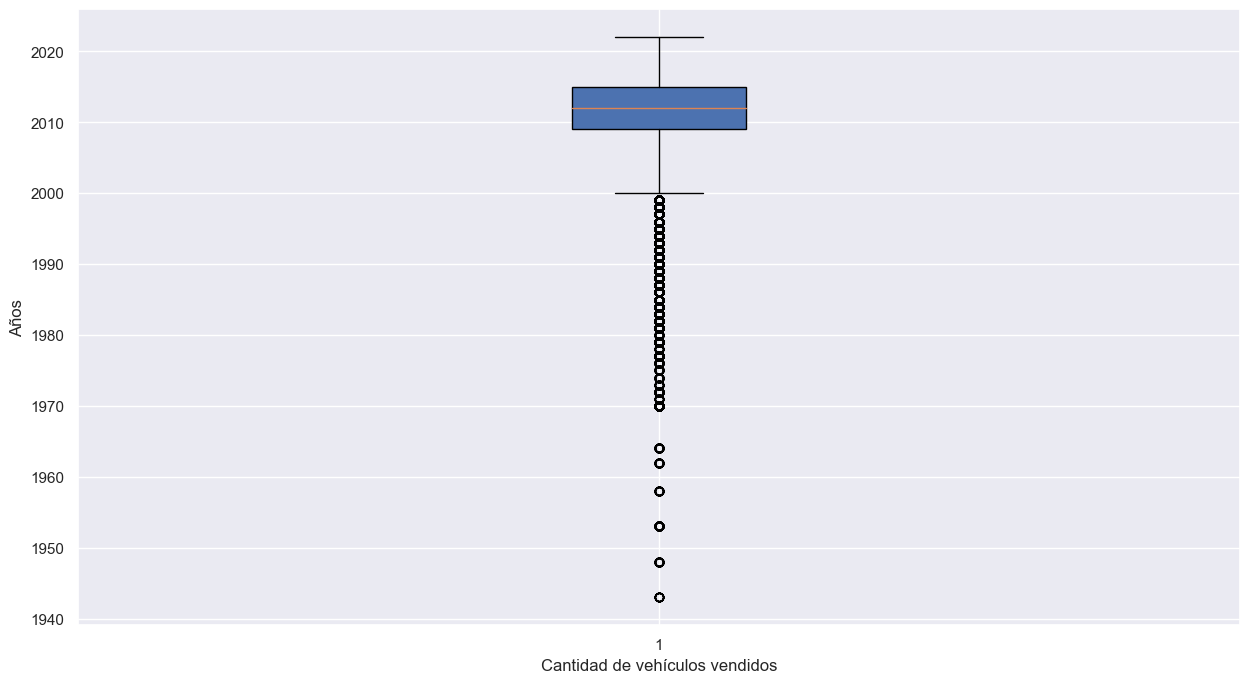

In [263]:
plt.figure(figsize = (15,8))
plt.boxplot(df1['year'], patch_artist=True)
plt.xlabel("Cantidad de vehículos vendidos")
plt.ylabel("Años")
plt.show()

El campo de años tiene muchos outliers. Pero estos vehículos son de colección y los valores más apartados son de cantidad mínima.

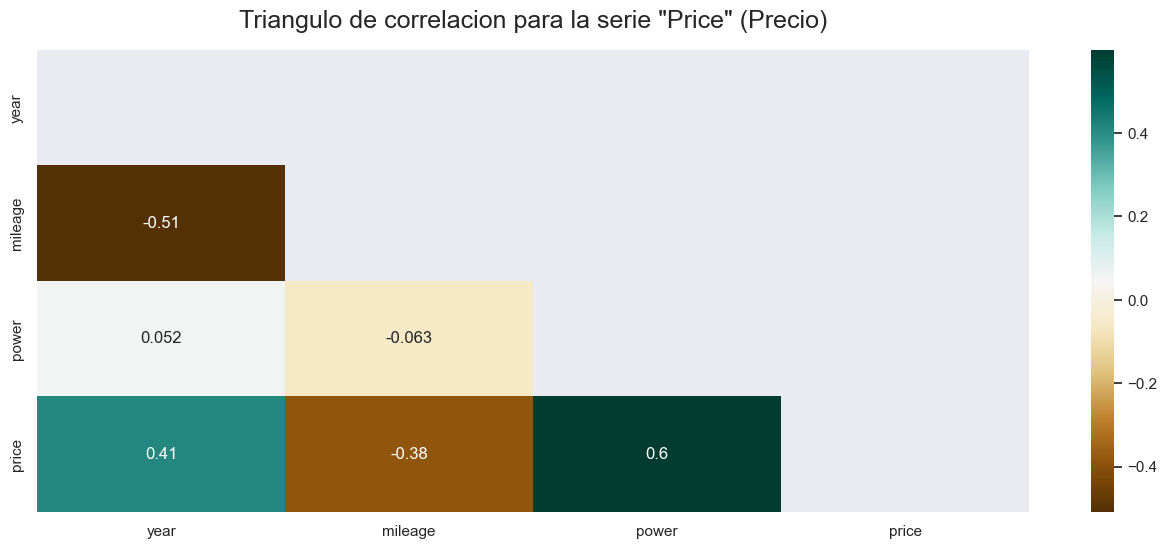

In [264]:
#Graficamos la correlacion en price
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr()["price"], dtype=np.float))
heatmap = sns.heatmap(df1.corr(), mask=mask, annot=True, cmap='BrBG')
heatmap.set_title('Triangulo de correlacion para la serie "Price" (Precio)', fontdict={'fontsize':18}, pad=16);

Vemos que los campos year, mileage tienen una correlación débil con respecto a price. Por otra parte,hay una correlación positiva medianamente fuerte entre el poder de la máquina y el precio de los autos. A medida que la unidad del poder de la máquina aumenta en 1, el precio aumenta en 0.6 .

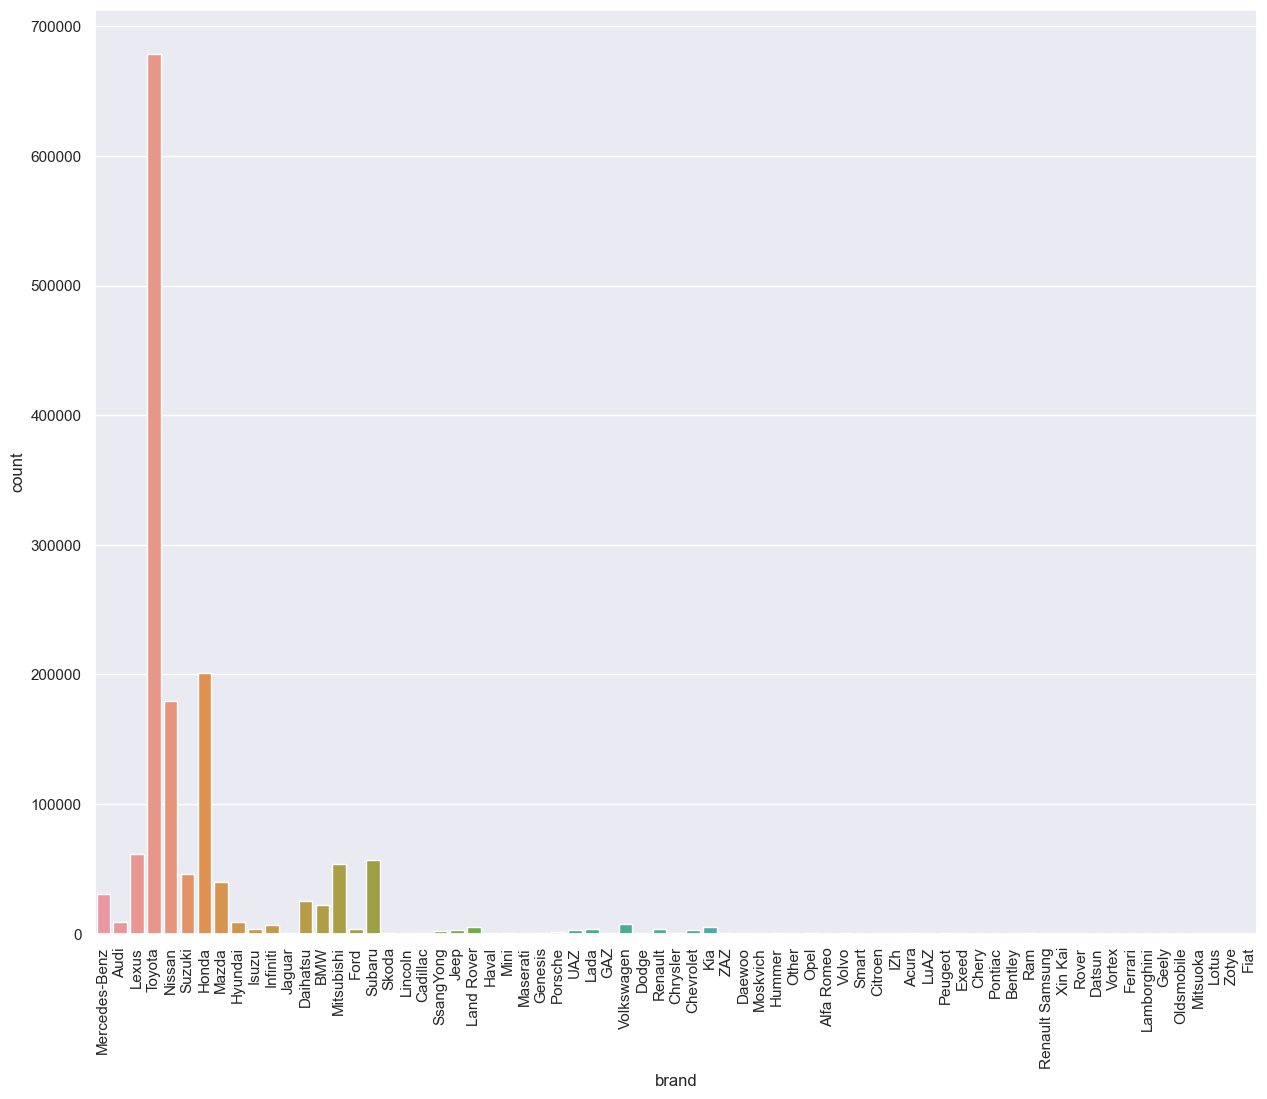

In [265]:
sns.countplot(data=df1,x="brand")
sns.set(rc={'figure.figsize':(15,12)})
plt.xticks(rotation=90)
plt.show()

- La cantidad de autos más vendida es Toyota, vamos a continuar explorando para hallar lo que nos solicita el caso.

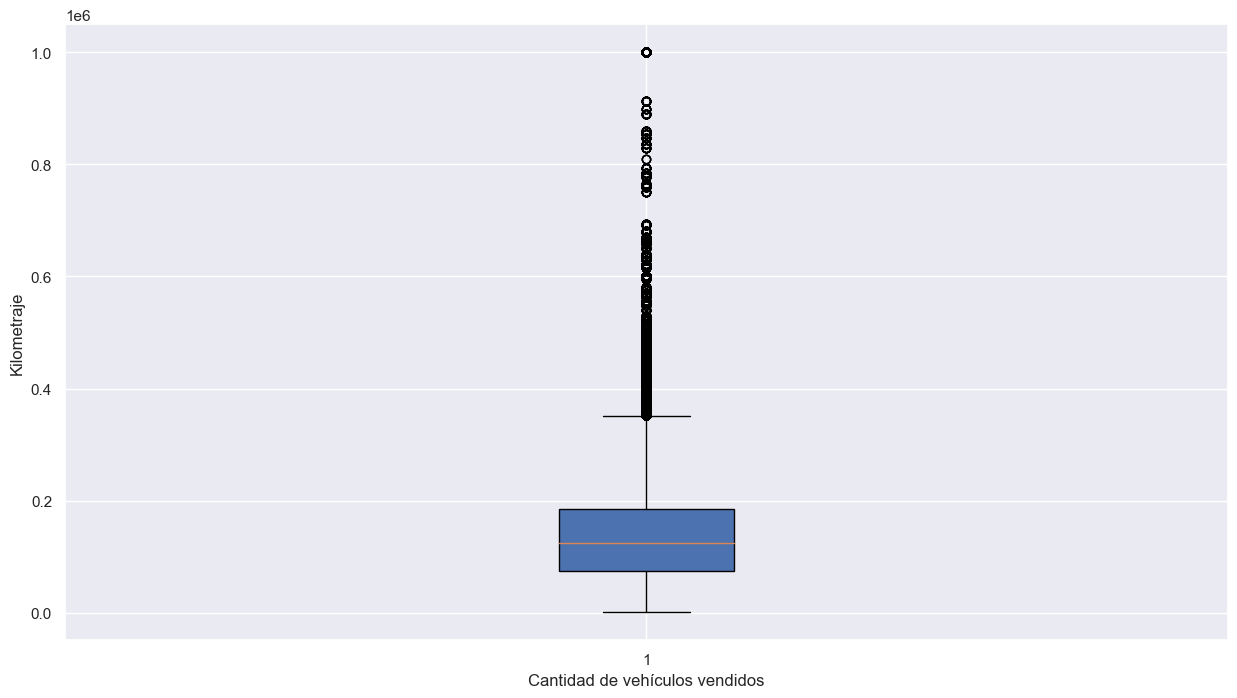

In [266]:
plt.figure(figsize = (15,8))
plt.boxplot(df1['mileage'], patch_artist=True)
plt.xlabel("Cantidad de vehículos vendidos")
plt.ylabel("Kilometraje")
plt.show()

- La mayoría de los autos vendidos tienen menos de 200000km recorridos. Sin embargo, hay muchos outliers que tendrían sentido de acuerdo al año del modelo.

In [267]:
df1['contador'] = 1
df2 = df1.groupby(['brand'])['contador'].agg('count')
df2

brand
Acura           257
Alfa Romeo      124
Audi           8738
BMW           22024
Bentley         164
              ...  
Volvo           898
Vortex           42
Xin Kai           4
ZAZ             277
Zotye            20
Name: contador, Length: 69, dtype: int64

In [268]:
np.where(df2 == np.amin(df2)) # Se obtiene 66 como la posición de la marca de autos con menos ventas

(array([66], dtype=int64),)

In [269]:
df2.iloc[66:67]

brand
Xin Kai    4
Name: contador, dtype: int64

La marca con menos ventas es Xin Kai, tan solo ha vendido 4 unidades. Ahora vamos a explorar sus registros.

In [270]:
df1[df1['brand']=="Xin Kai"]

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,contador
263561,Xin Kai,Xin Kai,minivan,blue,Diesel,2012.0,1000.0,CVT,85.0,100000,1
265653,Xin Kai,Xin Kai,minivan,blue,Diesel,2012.0,1000.0,CVT,85.0,100000,1
267742,Xin Kai,Xin Kai,minivan,blue,Diesel,2012.0,1000.0,CVT,85.0,100000,1
269806,Xin Kai,Xin Kai,minivan,blue,Diesel,2012.0,1000.0,CVT,85.0,100000,1


In [271]:
# Para la marca menos vendida los valores de sus campos year, mileage, power y price son 2012, 1000, 85 y 100000 respectivamente.
mediana_y = df1["year"].median()
mediana_m= df["mileage"].median()
mediana_p = df["power"].median()
mediana_pr = df["price"].median()
print(f"La mediana de year es: {mediana_y}, la mediana de mileage es: {mediana_m}, la mediana de power es: {mediana_p} y la mediana de price es: {mediana_pr}")

La mediana de year es: 2012.0, la mediana de mileage es: 124000.0, la mediana de power es: 132.0 y la mediana de price es: 857000.0


## Conclusión 1:
En cuanto a cantidad de vehículos vendidos podemos inferir que la marca Xin Kai en las pocas ventas que ha tenido son autos del 2012 y su precio ha sido muy por debajo de la mediana.
Pero algo muy marcado por la tendencia es vender autos con mucho más poder de caballos de fuerza incluso sacrificando el precio y el kilometraje obtenido.

Ahora vamos a buscar cual es la marca que genera menos ingresos porque la pregunta puede ser interpretada de otra forma.

In [234]:
df3 = df1.groupby(['brand'])['price'].agg('sum')
df3

brand
Acura           260550000
Alfa Romeo      279105000
Audi          20680573866
BMW           80142381295
Bentley         784999985
                 ...     
Volvo          1283514987
Vortex           13020000
Xin Kai            400000
ZAZ              82570000
Zotye            19000000
Name: price, Length: 69, dtype: int64

In [235]:
np.where(df3 == np.amin(df3)) # Se obtiene 66 como la posición de la marca de autos con menos ingresos

(array([66], dtype=int64),)

In [236]:
df3.iloc[66:67]

brand
Xin Kai    400000
Name: price, dtype: int64

## Recomendaciones
Se ha validado que la marca que tiene menos cantidad de autos vendidos y menos ingresos de autos vendidos es la misma (Xin Kai). Por lo tanto vamos a brindar las siguientes recomendaciones:
   - Para aumentar la cantidad de ventas se debe ingresar modelos con power que tiendan a 132 sin importar el kilometraje o el precio que le corresponda.
   - De acuerdo a nuestro triángulo de correlación, el campo que más influye en el precio es el power. Entonces se refuerza el punto anterior y para aumentar el precio de cada vehículo, se debe traer modelos con más power.